In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
n = 10000
b = 1 
rho = 1
rho1 = 0.91
alpha = 0.05

In [3]:
deterministic_trend = np.zeros(n)
stochastic_trend = np.zeros(n)
stochastic_stationary_trend = np.zeros(n)

In [4]:
deterministic_trend[0] = 0
stochastic_trend[0] = 0
stochastic_stationary_trend[0] = 0

In [5]:
for i in range(1, n):
    stochastic_stationary_trend[i] = alpha + rho1*stochastic_stationary_trend[i-1] +b*np.random.randn()
    stochastic_trend[i] = alpha + rho*stochastic_trend[i-1] +b*np.random.randn()
    deterministic_trend[i] = alpha*i + b*np.random.randn()

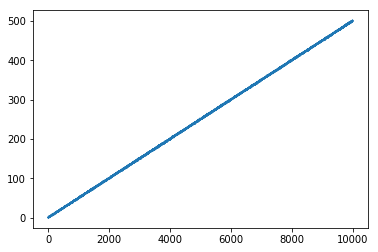

In [6]:
plt.plot(deterministic_trend)

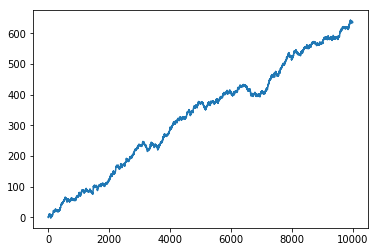

In [7]:
plt.plot(stochastic_trend)

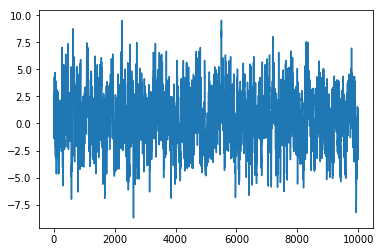

In [8]:
plt.plot(stochastic_stationary_trend)

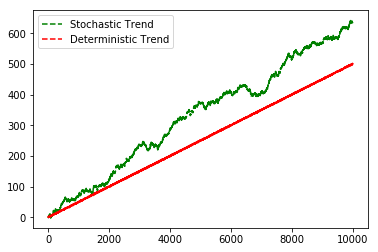

In [9]:
plt.plot(stochastic_trend,'g--', label="Stochastic Trend")
plt.plot(deterministic_trend,'r--', label="Deterministic Trend")
plt.legend()
plt.show()

In [10]:
def check_stationary(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [11]:
check_stationary(pd.Series(stochastic_trend))

ADF Statistic: -0.715379
p-value: 0.842726
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [12]:
check_stationary(pd.Series(stochastic_stationary_trend))

ADF Statistic: -21.722471
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
